In [1]:
import autograd.numpy as np_
from autograd import grad
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('data/dados_A771_H_2019-01-01_2024-10-17.csv', sep=';', skiprows=10)
df.drop(columns=["Unnamed: 3"], inplace=True)
df.head()

,Data Medicao,Hora Medicao,TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C)
0,2019-01-01,0,21.5
1,2019-01-01,100,21.6
2,2019-01-01,200,21.1
3,2019-01-01,300,20.7
4,2019-01-01,400,20.9


In [40]:
def criar_janelas_temporais(df, n_passos):
    X, Y = [], []

    for i in range(n_passos, len(df)):
        X.append(df['Temperatura'].values[i - n_passos:i])
        Y.append(df['Temperatura'].values[i])
        
    return np_.array(X), np_.array(Y)

def loss(parametros):
    w, b, pontos, val = parametros
    est = w.T @ pontos.T + b
    mse = np_.mean((est - val)**2)
    return mse

g = grad(loss)

def accuracy(y_test, y_est):
    return np_.mean(np_.sign(y_test) == np_.sign(y_est))

C:\Users\jpqv0\AppData\Local\Temp\ipykernel_27620\1792481873.py:23: RuntimeWarning: invalid value encountered in subtract
  w -= alpha * grad_[0]


Acurácia: 0.0


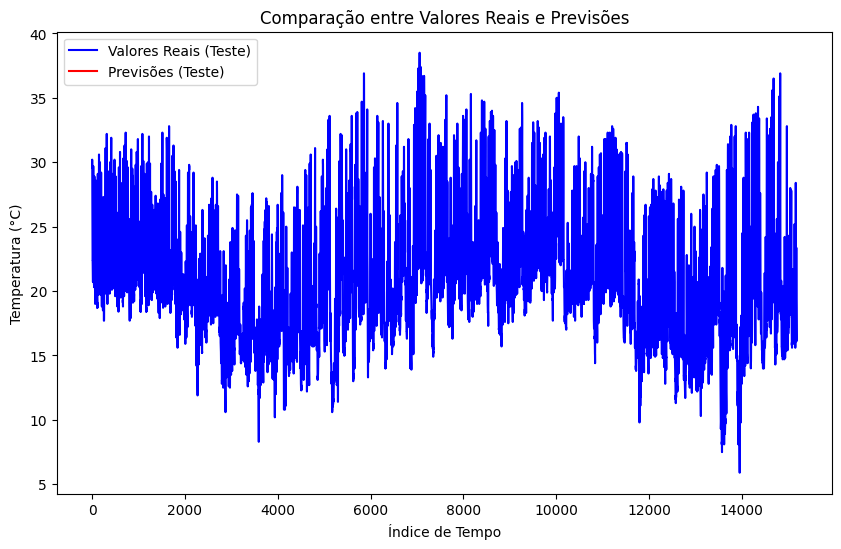

In [41]:
df['Temperatura'] = pd.to_numeric(df['TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C)'], errors='coerce')
df = df.dropna()

n_passos = 5
X, Y = criar_janelas_temporais(df, n_passos)

n_treino = int(0.7 * len(X))
X_train, X_test = X[:n_treino], X[n_treino:]
y_train, y_test = Y[:n_treino], Y[n_treino:]

N_DIMENSOES = X_train.shape[1]

w = np_.random.randn(N_DIMENSOES, 1)
b = 0.0
alpha = 10**-2
n_treinos = 10000

pontos = X_train
alvos = y_train

for n in range(10000):
    grad_ = g((w, b, pontos, alvos))
    w -= alpha * grad_[0]
    b -= alpha * grad_[1]

y_est = w.T @ X_test.T + b

print(f"Acurácia: {accuracy(y_test, y_est)}")

plt.figure(figsize=(10,6))
plt.plot(range(len(y_test)), y_test, label="Valores Reais (Teste)", color='blue')
plt.plot(range(len(y_est[0])), y_est[0], label="Previsões (Teste)", color='red')
plt.title("Comparação entre Valores Reais e Previsões")
plt.xlabel("Índice de Tempo")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.show()